In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import NMF
import numpy as np
import pickle
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 500
# Read file
df1 = pd.read_pickle('data_prep.pkl')

In [3]:
kmin, kmax = 4, 50

In [4]:
my_stop_words = open(r'C:\Users\admin\Desktop\stop-words.txt').read().split('\n')

vectorizer = TfidfVectorizer(stop_words=my_stop_words, min_df = 20)
A = vectorizer.fit_transform(df1['content'])
terms = vectorizer.get_feature_names()

In [5]:
from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF(random_state =1, init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...
Applying NMF for k=26 ...
Applying NMF for k=27 ...
Applying NMF for k=28 ...
Applying NMF for k=29 ...
Applying NMF for k=30 ...
Applying NMF for k=31 ...
Applying NMF for k=32 ...
Applying NMF for k=33 ...
Applying NMF for k=34 ...
Applying NMF for k=35 ...
Applying NMF for k=36 ...
Applying NMF for k=37 ...
Applying NMF for k=38 ...
Applying NMF for k=39 ...
Applying NMF for k=40 ...
Applying NMF for k=41 ...
Applying NMF for k

In [6]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [7]:
raw_documents = []
for line in df1['content']:
    raw_documents.append( line.strip().lower() )
print("Read %d raw text documents" % len(raw_documents))

Read 5109 raw text documents


In [8]:
raw_documents[:2]

['不满，一岁，的，永康，是，个，饱经，病痛，折磨，的，孩子，，，２，０，１，１，年，７，月，５，日，出生，的，他，，，患有，先天性，心脏病，、，疝气，，，一，出生，便，被遗弃，。，２，０，１，２，年，１，月，８，日，，，才，５，个，月，大，的，永康，被，发现，呼吸困难，，，随后，送往，医院，进行，抢救，治疗，，，病情，稳定，后于，１，月，２，８，日，出院，。，，２，０，１，２，年，２，月，１，３，号，，，永康，在，思源，焦点，公益，基金，的，帮助，下，在，医院，接受，手术，治疗，，，术后，仅，８，天，，，永康，突发，右侧，腹股沟，斜，疝，嵌顿，及，肠梗阻，，，又，再次，进行，抢救，治疗，，，术后，进，重症，监护室，。，３，月，７，日，，，几经，病痛，折磨，的，永康，终于，康复，出院，，，目前，他，的，病情，已经，稳定，。',
 '２，０，０，９，年，８，月，，，《，２，０，０，９，中国，慈善，导航，行动，》，第一季，正式，启动，，，此档，由，ｃ，ｃ，ｔ，ｖ，－，１，２，《，大家，看法，》，精心制作，的，节目，将，于，２，０，０，９，年，８，月，１，７，日至，８，月，２，３，日，每晚，８，点整，在，中央电视台，社会，与，法，频道，ｃ，ｃ，ｔ，ｖ，－，１，２，正式，播出，。，节目，将，从，１，０，０，多个，“，５，．，１，２，灾后，重建，资助，项目，”，中，挑选出，１，８，个，优秀，服务项目，参与，电视，评估，及，展示，，，１，８，个，项目，中，究竟，哪些项目，将，得到，千万，基金，的，支持，…，\u3000，［，详细，］']

In [10]:
stop_words = open(r'C:\Users\admin\Desktop\stop-words.txt').read().split('\n')

In [12]:
import gensim
docgen = TokenGenerator( raw_documents, stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, size=500, min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [13]:
print( "Model has %d terms" % len(w2v_model.wv.vocab) )

Model has 3014 terms


In [14]:
w2v_model.save("w2v-model.bin")

In [29]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):#俩俩之间的排列组合
            
            # 作业四：使用 word2vector 模型，计算 pair 之间的相似度
            pair_scores.append( w2v_model.similarity(pair[0],pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [30]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [31]:
from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model,term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=04: Coherence=0.5786
K=05: Coherence=0.6094
K=06: Coherence=0.6203
K=07: Coherence=0.6307
K=08: Coherence=0.6144
K=09: Coherence=0.6448
K=10: Coherence=0.6637
K=11: Coherence=0.6914
K=12: Coherence=0.7025
K=13: Coherence=0.7095
K=14: Coherence=0.7053
K=15: Coherence=0.6936
K=16: Coherence=0.6927
K=17: Coherence=0.6966
K=18: Coherence=0.6938
K=19: Coherence=0.7144
K=20: Coherence=0.7090
K=21: Coherence=0.7088
K=22: Coherence=0.7131
K=23: Coherence=0.7086
K=24: Coherence=0.7194
K=25: Coherence=0.7150
K=26: Coherence=0.7081
K=27: Coherence=0.7114
K=28: Coherence=0.7140
K=29: Coherence=0.7075
K=30: Coherence=0.7123
K=31: Coherence=0.7143
K=32: Coherence=0.7113
K=33: Coherence=0.7060
K=34: Coherence=0.6931
K=35: Coherence=0.6993
K=36: Coherence=0.7049
K=37: Coherence=0.7146
K=38: Coherence=0.7005
K=39: Coherence=0.7166
K=40: Coherence=0.7042
K=41: Coherence=0.7064
K=42: Coherence=0.7095
K=43: Coherence=0.7112
K=44: Coherence=0.7087
K=45: Coherence=0.7116
K=46: Coherence=0.7059
K=47: Coher

In [32]:
import matplotlib
%matplotlib inline
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

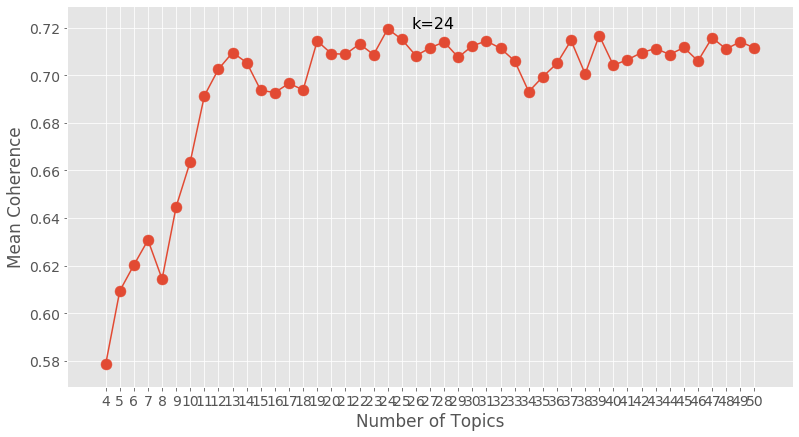

In [33]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [34]:
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [35]:
for topic_index in range(k):
    descriptor = get_descriptor( terms, H, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: 体育, 天下, 搜狐, 广播节目, 节目, 最强音, 传统媒体, 跨入, 诚邀, 联系电话
Topic 02: 我们, 自己, 一个, 他们, 没有, 可以, 已经, 因为, 现在, 这个
Topic 03: 增长, 亿元, 同比, 上半年, 下降, 月份, 今年, 数据, 环比, 亿美元
Topic 04: 奥运会, 比赛, 伦敦, 奥运, 北京, 选手, 冠军, 英国, 获得, 分钟
Topic 05: 叙利亚, 土耳其, 安南, 联合国, 反对派, 阿萨德, 大马士革, 巴沙尔, 武装, 冲突
Topic 06: 工作, 发展, 建设, 要求, 项目, 会议, 召开, 推进, 服务, 问题
Topic 07: 公司, 公告, 股份, 有限公司, 万元, 集团, 董事会, 股东, 重大, 业绩
Topic 08: 中国, 国际, 经济, 北京, 全球, 发展, 韩国, 合作, 国家, 世界
Topic 09: 发生, 死亡, 造成, 事故, 受伤, 袭击, 医院, 一辆, 当地, 警方
Topic 10: 男子, 警方, 一名, 嫌疑人, 民警, 犯罪, 报警, 派出所, 抓获, 接到
Topic 11: 发现, 社区, 居民, 现场, 市民, 小区, 昨日, 进行, 车辆, 上午
Topic 12: 学生, 考生, 学校, 高考, 教育, 录取, 志愿, 今年, 考试, 招生
Topic 13: 航天员, 神舟, 九号, 飞船, 天宫, 载人, 对接, 一号, 任务, 飞行
Topic 14: 美国, 奥巴马, 英国, 报道, 经济, 全球, 总统, 华盛顿, 显示, 一些
Topic 15: 天气, 暴雨, 地区, 气温, 毫米, 高温, 南部, 出现, 部分, 北部
Topic 16: 报告, 产品, 提交, 必须, 申请, 审核, 编辑, 为什么, 通过, 合格
Topic 17: 日本, 钓鱼岛, 东京, 报道, 日本共同社, 政府, 领土, 中新网, 韩国, 反对
Topic 18: 价格, 蔬菜, 上涨, 监测, 下降, 使用, 持平, 涨幅, 为主, 相比
Topic 19: 美元, 市场, 欧元, 利率, 央行, 下跌, 下调, 经济, 银行, 欧洲央行
Topic 20: 伊朗, 制裁, 欧盟, 石油, 导弹, 国家, 进